In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    accuracy_score, f1_score, roc_curve, auc, precision_score, recall_score,
    ConfusionMatrixDisplay, balanced_accuracy_score
)
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
plt.style.use('ggplot')
%matplotlib inline
sns.set_palette("pastel")



INTERPRETABILIDAD DEL MODELO CON LIME (Versión Visual)
📦 Cargando modelo y datos procesados...
✅ Modelo y datos cargados correctamente
✅ Explainer LIME creado correctamente

📋 Caso 0 — Cliente con Churn Real: 0
Predicción del modelo: 0


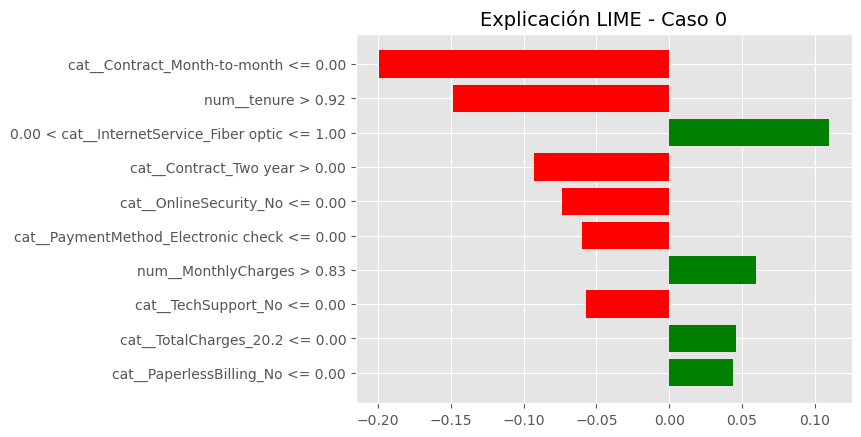


📋 Caso 10 — Cliente con Churn Real: 0
Predicción del modelo: 0


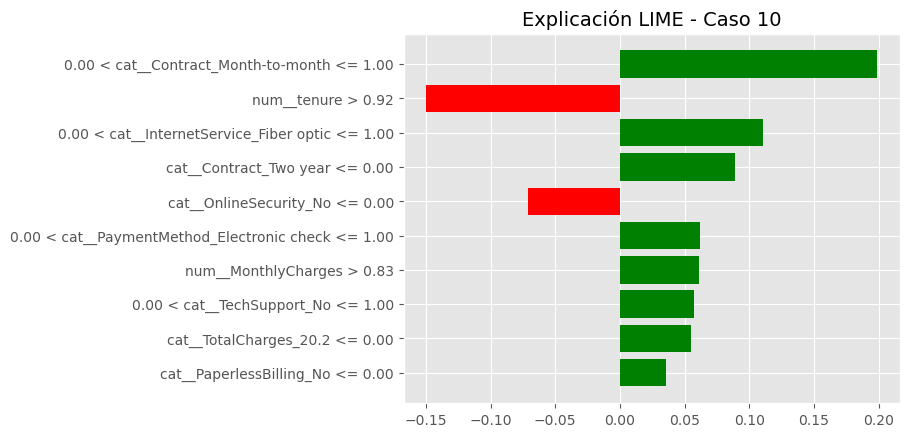


📋 Caso 25 — Cliente con Churn Real: 0
Predicción del modelo: 0


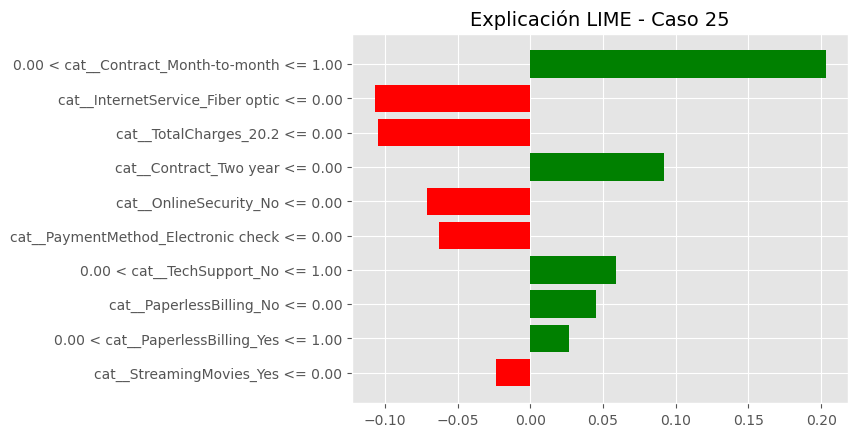


📋 Caso 40 — Cliente con Churn Real: 0
Predicción del modelo: 0


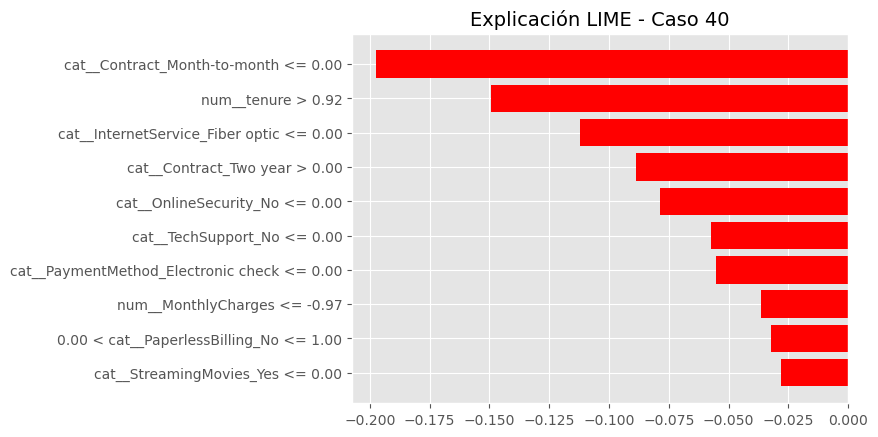


✅ Interpretabilidad completada exitosamente.


In [4]:
# =============================================================================
# INTERPRETABILIDAD CON LIME - VERSIÓN VISUAL PARA NOTEBOOK
# =============================================================================
import joblib
import numpy as np
import pandas as pd
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

print("\n" + "="*80)
print("INTERPRETABILIDAD DEL MODELO CON LIME (Versión Visual)")
print("="*80)

# -----------------------------------------------------------------------------
# 1️⃣ CARGAR DATOS Y MODELO
# -----------------------------------------------------------------------------
print("📦 Cargando modelo y datos procesados...")

# Ajusta las rutas según tu estructura
best_pipeline = joblib.load("app/model.joblib")  
data_dict = joblib.load("app/data_splits.joblib")

X_train = data_dict["X_train"]
X_test = data_dict["X_test"]
y_train = data_dict["y_train"]
y_test = data_dict["y_test"]

print("✅ Modelo y datos cargados correctamente")

# -----------------------------------------------------------------------------
# 2️⃣ EXTRAER PREPROCESADOR Y MODELO BASE
# -----------------------------------------------------------------------------
preprocessor = best_pipeline.named_steps["preprocessor"]
model = best_pipeline.named_steps["model"]

# -----------------------------------------------------------------------------
# 3️⃣ TRANSFORMAR DATOS PARA LIME
# -----------------------------------------------------------------------------
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Obtener nombres de características
if hasattr(preprocessor, "get_feature_names_out"):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]

# -----------------------------------------------------------------------------
# 4️⃣ CREAR EXPLAINER LIME
# -----------------------------------------------------------------------------
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_transformed),
    feature_names=feature_names,
    class_names=["No Churn", "Churn"],
    mode="classification",
    discretize_continuous=True,
    random_state=42
)

print("✅ Explainer LIME creado correctamente")

# -----------------------------------------------------------------------------
# 5️⃣ FUNCIÓN PARA VISUALIZAR EXPLICACIÓN
# -----------------------------------------------------------------------------
def mostrar_explicacion(idx):
    """
    Genera y muestra la explicación LIME para un caso del test set.
    """
    instance = X_test.iloc[[idx]]
    instance_transformed = preprocessor.transform(instance)

    exp = explainer.explain_instance(
        data_row=instance_transformed[0],
        predict_fn=model.predict_proba,
        num_features=10
    )
    
    print(f"\n📋 Caso {idx} — Cliente con Churn Real: {y_test.iloc[idx]}")
    print("Predicción del modelo:", model.predict(instance_transformed)[0])
    
    # Mostrar el gráfico directamente
    fig = exp.as_pyplot_figure(label=1)
    plt.title(f"Explicación LIME - Caso {idx}", fontsize=14)
    plt.show()

# -----------------------------------------------------------------------------
# 6️⃣ SELECCIONAR CASOS INTERESANTES
# -----------------------------------------------------------------------------
# Algunos ejemplos de casos típicos
casos = [0, 10, 25, 40]  # Puedes cambiar índices según tus datos

for idx in casos:
    mostrar_explicacion(idx)

print("\n✅ Interpretabilidad completada exitosamente.")
